In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from string import ascii_letters

In [2]:
full_df = pd.read_csv('NormDF', index_col=0)
full_df.head()



,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5,S1,S2,S3,Y1,Y2,C3',C5',P(mid),C6'
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,-0.046771,-0.044253,-0.047690,-0.011825,-0.012687,0.136364,0.000373,...,0.001057,-0.020674,-0.003328,-0.006702,-0.513196,0.296188,0.470674,-0.007648,-0.046532,0.058284
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,-0.071161,-0.040549,-0.052452,-0.015810,0.053274,-0.863636,-0.000713,...,0.042894,0.008358,0.131954,0.107651,0.486804,-0.703812,-0.529326,0.074404,-0.046532,-0.052827
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,-0.083356,-0.010920,-0.014357,-0.016285,-0.028094,0.136364,-0.000631,...,-0.034456,-0.023900,-0.094237,-0.098884,0.486804,-0.703812,-0.529326,-0.012624,-0.012634,-0.052827
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,-0.028478,0.003895,0.004691,-0.011376,0.029201,0.136364,-0.000560,...,-0.016554,0.037390,-0.066098,-0.040541,0.486804,0.296188,-0.529326,-0.013322,0.004315,-0.052827
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,0.087376,0.040932,0.052310,0.026762,-0.032908,0.136364,-0.000349,...,0.003976,-0.004545,0.031304,0.025970,-0.513196,0.296188,0.470674,-0.009035,0.046688,-0.002827


In [3]:
#Calculate correlation with .corr(): 
print(full_df.corr())

           P(IPO)      P(H)      P(L)   P(1Day)        C1        C2        C3  \
P(IPO)   1.000000  0.867953  0.888556  0.038929  0.016603  0.218751  0.015709   
P(H)     0.867953  1.000000  0.990618  0.038671 -0.013412  0.188453  0.001585   
P(L)     0.888556  0.990618  1.000000  0.042100 -0.007560  0.205707  0.002475   
P(1Day)  0.038929  0.038671  0.042100  1.000000 -0.023288  0.034825 -0.131636   
C1       0.016603 -0.013412 -0.007560 -0.023288  1.000000 -0.017937  0.001916   
C2       0.218751  0.188453  0.205707  0.034825 -0.017937  1.000000  0.007315   
C3       0.015709  0.001585  0.002475 -0.131636  0.001916  0.007315  1.000000   
C4      -0.049557 -0.091464 -0.094337 -0.056249  0.034674 -0.050363  0.002999   
C5       0.376640  0.337514  0.348534 -0.007910  0.007371  0.128547 -0.000830   
C6       0.364109  0.317631  0.334299 -0.010152  0.008988  0.123738  0.010819   
C7       0.230273  0.218296  0.232358 -0.016819  0.030425  0.094346  0.006326   
T1       0.208112  0.185541 

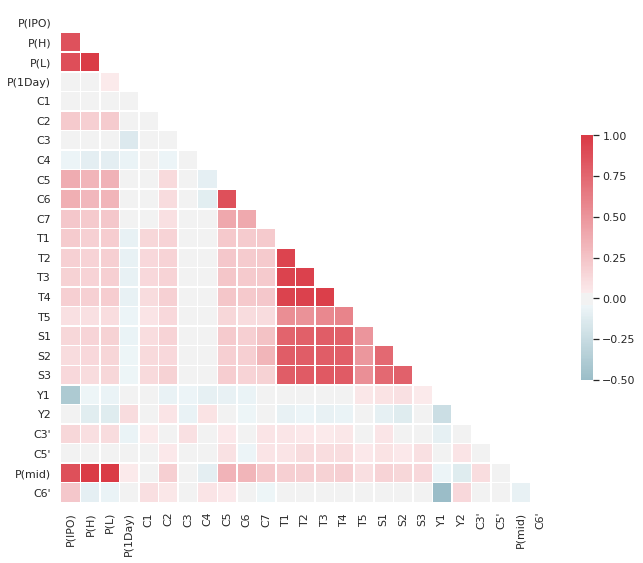

In [4]:
# Compute the correlation matrix
corr = full_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-.5, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##Cannot figure out how to get the scale from 1 to -1????

In [6]:
#Sort out the top correlation values
def correl(full_df):
    cor = full_df.corr()
    corrm = np.corrcoef(full_df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]
    ## Thresh hold above 0.5 for highly correlated results        
    thresh = 0.5
    display(high_cor[high_cor<thresh])
correl(corr)

max corr: 0.9998932665758092 , min corr:  -0.7888161429081909


C6       P(L)       0.493144
C5       P(L)       0.492411
C6       P(mid)     0.487719
P(mid)   C5         0.487290
P(H)     C6         0.482849
         C5         0.482688
S2       C7         0.337485
Y2       C6'        0.315878
P(L)     C7         0.314870
P(mid)   C7         0.309762
P(IPO)   C7         0.305363
C7       P(H)       0.305211
S1       C7         0.303933
C2       P(IPO)     0.290063
T1       C7         0.273534
C7       T4         0.272452
C2       P(L)       0.267743
T2       C7         0.267501
T3       C7         0.265848
C2       P(mid)     0.262197
P(H)     C2         0.257273
S3       C7         0.235413
P(1Day)  Y2         0.230553
Y1       S2         0.199310
Y2       C4         0.194677
C7       T5         0.181915
S1       Y1         0.179066
C2       T1         0.172272
         T4         0.171817
         T2         0.167103
                      ...   
C4       C2        -0.249158
Y2       T5        -0.285010
P(1Day)  C3        -0.287549
C4       P(IPO

In [8]:
#Sort out low correlation values
def correl(comp_df):
    cor = comp_df.corr()
    corrm = np.corrcoef(comp_df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    low_cor = c1[c1.values!=1]
    ## Thresh hold above 0.5 for highly correlated results        
    thresh = 0.5
    display(low_cor[low_cor<thresh])
correl(corr)

max corr: 0.9998932665758092 , min corr:  -0.7888161429081909


C6       P(L)       0.493144
C5       P(L)       0.492411
C6       P(mid)     0.487719
P(mid)   C5         0.487290
P(H)     C6         0.482849
         C5         0.482688
S2       C7         0.337485
Y2       C6'        0.315878
P(L)     C7         0.314870
P(mid)   C7         0.309762
P(IPO)   C7         0.305363
C7       P(H)       0.305211
S1       C7         0.303933
C2       P(IPO)     0.290063
T1       C7         0.273534
C7       T4         0.272452
C2       P(L)       0.267743
T2       C7         0.267501
T3       C7         0.265848
C2       P(mid)     0.262197
P(H)     C2         0.257273
S3       C7         0.235413
P(1Day)  Y2         0.230553
Y1       S2         0.199310
Y2       C4         0.194677
C7       T5         0.181915
S1       Y1         0.179066
C2       T1         0.172272
         T4         0.171817
         T2         0.167103
                      ...   
C4       C2        -0.249158
Y2       T5        -0.285010
P(1Day)  C3        -0.287549
C4       P(IPO